# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


In [1]:
import pandas as pd
import seaborn as sns

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
# Your code here
df = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows = 500000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
step              500000 non-null int64
type              500000 non-null object
amount            500000 non-null float64
nameOrig          500000 non-null object
oldbalanceOrg     500000 non-null float64
newbalanceOrig    500000 non-null float64
nameDest          500000 non-null object
oldbalanceDest    500000 non-null float64
newbalanceDest    500000 non-null float64
isFraud           500000 non-null int64
isFlaggedFraud    500000 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.0
mean,13.906728,1.663937e+05,9.116928e+05,9.314261e+05,9.827739e+05,1.162668e+06,0.000466,0.0
std,3.731891,2.725841e+05,3.016901e+06,3.054015e+06,2.336426e+06,2.510610e+06,0.021582,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.335032e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.137560e+04,1.856900e+04,0.000000e+00,1.192711e+05,2.221441e+05,0.000000,0.0
75%,17.000000,2.226441e+05,1.702941e+05,2.101716e+05,8.962267e+05,1.201403e+06,0.000000,0.0
max,20.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


### What is the distribution of the outcome? 

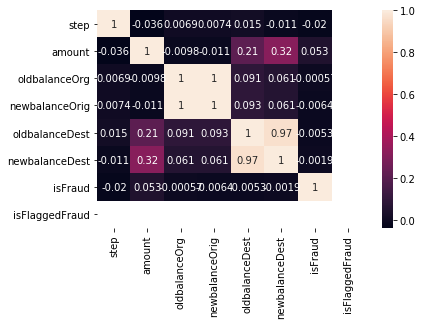

In [5]:
# Your response here
sns.heatmap(df.corr(), annot = True)

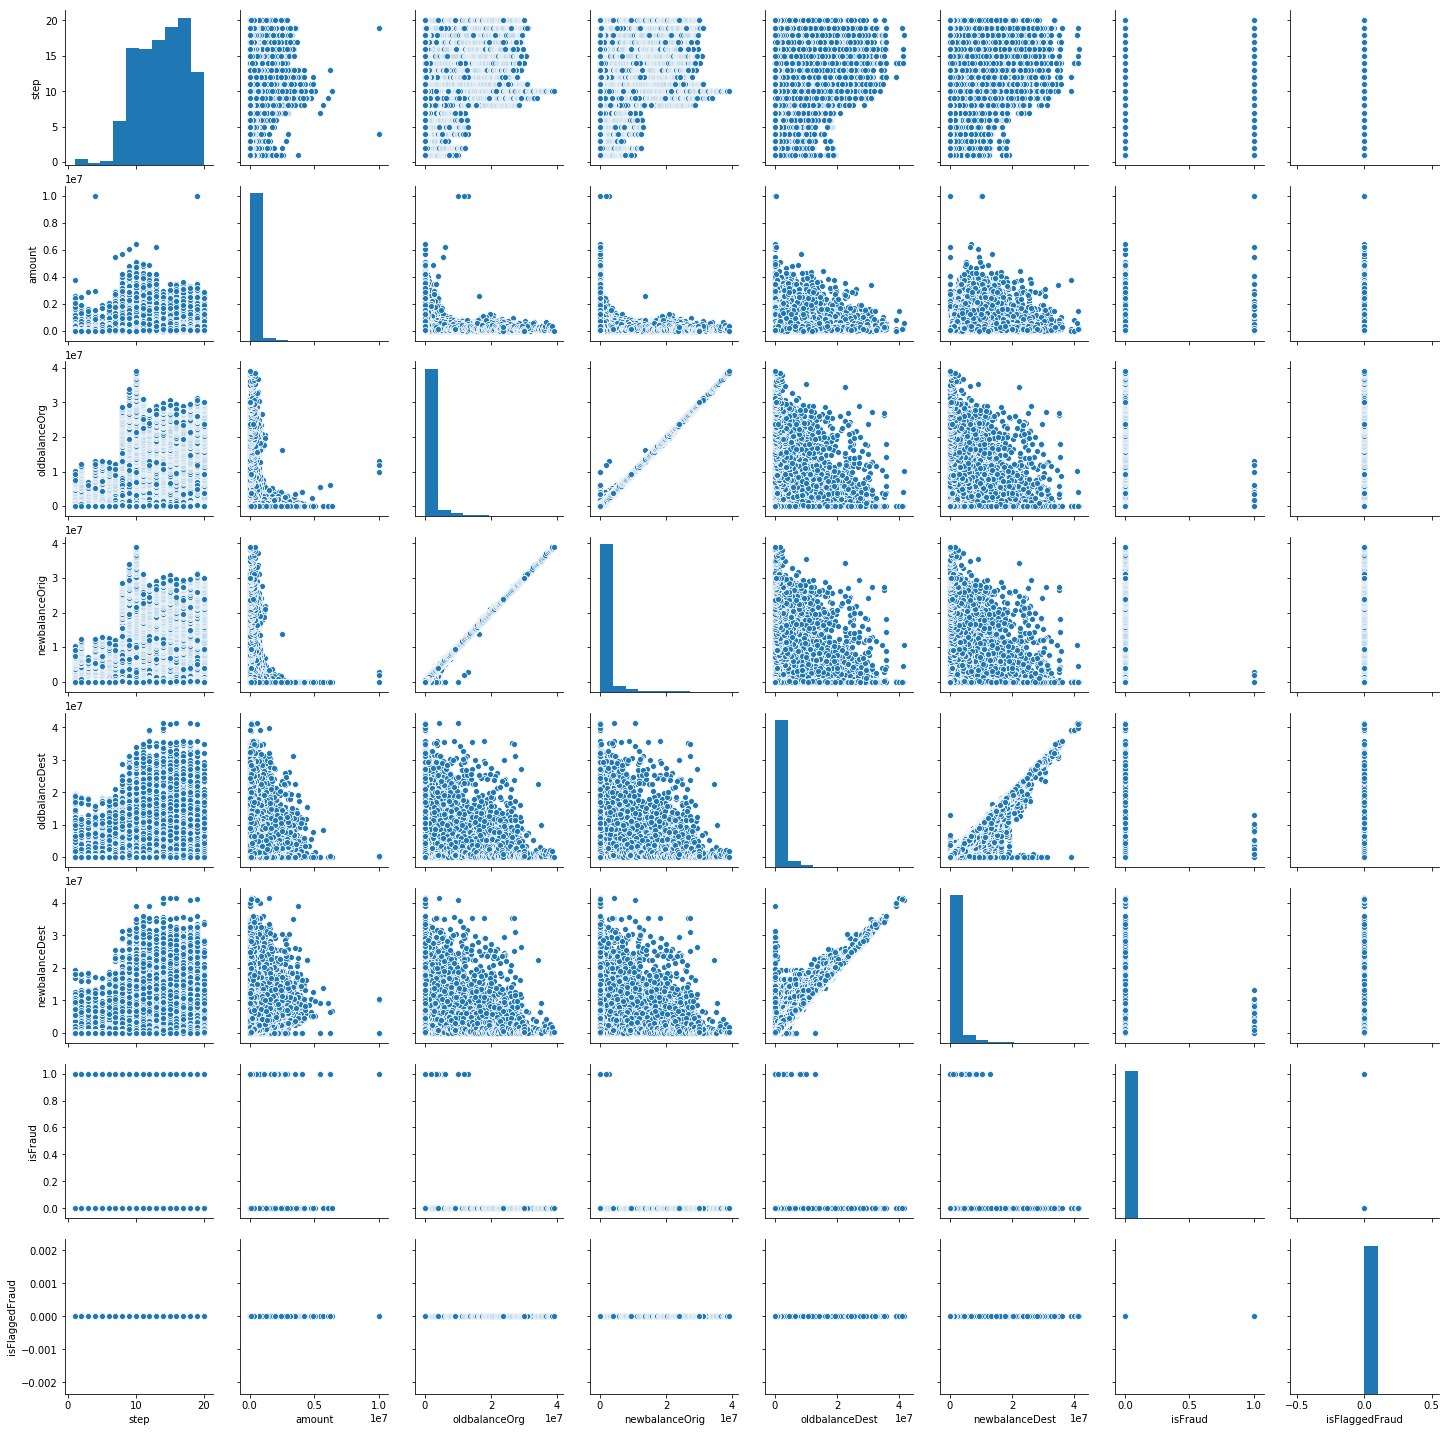

In [6]:
sns.pairplot(df)

In [7]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
499995,20,CASH_OUT,77616.32,C1125584113,402794.6,325178.28,C596605403,662541.78,410073.66,0,0
499996,20,CASH_OUT,63262.20,C1632642338,8500.0,0.00,C1989325178,0.00,63262.20,0,0
499997,20,PAYMENT,15019.29,C2105678886,5253.0,0.00,M171574465,0.00,0.00,0,0
499998,20,TRANSFER,355628.70,C1907483123,0.0,0.00,C1880058411,6533824.07,6889452.78,0,0
499999,20,TRANSFER,70926.24,C296264658,0.0,0.00,C1038100083,111518.78,182445.01,0,0


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df_dummies = pd.get_dummies(df.type, drop_first= True)

In [17]:
dfclean = df.join(df_dummies)

In [24]:
dfclean.drop(columns = ['type', 'nameOrig', 'newbalanceOrig','nameDest', 'newbalanceDest', 'isFlaggedFraud'], inplace = True)

In [53]:
X['isFraud'].value_counts() #We need to increase the fraud sample

0    499767
1       233
Name: isFraud, dtype: int64

In [69]:
X = dfclean.copy()

In [70]:
y = X['isFraud']

In [71]:
X.drop(columns = 'isFraud', inplace = True)

In [72]:
X.head()

,step,amount,oldbalanceOrg,oldbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,0.0,0,0,1,0
1,1,1864.28,21249.0,0.0,0,0,1,0
2,1,181.00,181.0,0.0,0,0,0,1
3,1,181.00,181.0,21182.0,1,0,0,0
4,1,11668.14,41554.0,0.0,0,0,1,0


In [73]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [78]:
from sklearn.preprocessing import scale
X = scale(X)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


In [79]:
from imblearn import over_sampling
from collections import Counter

In [80]:
resample = over_sampling.SMOTE(random_state = 12)

In [81]:
x_res, y_resample = resample.fit_resample(X,y)

In [82]:
Counter(y_resample)

Counter({0: 499767, 1: 499767})

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [ ]:
# Your code here
#I think it's fine like it is

### Run a logisitc regression classifier and evaluate its accuracy.

In [84]:
len(x_res)

999534

In [86]:
len(y_resample)

999534

In [88]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_resample, test_size=0.2, random_state=12)

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8769777946745236

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[86146 14055]
 [10538 89168]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88    100201
           1       0.86      0.89      0.88     99706

   micro avg       0.88      0.88      0.88    199907
   macro avg       0.88      0.88      0.88    199907
weighted avg       0.88      0.88      0.88    199907



### Now pick a model of your choice and evaluate its accuracy.

In [94]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()

In [95]:
model2.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_pred2 = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[100044    157]
 [    29  99677]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100201
           1       1.00      1.00      1.00     99706

   micro avg       1.00      1.00      1.00    199907
   macro avg       1.00      1.00      1.00    199907
weighted avg       1.00      1.00      1.00    199907



### Which model worked better and how do you know?

In [ ]:
# Your response here
# Looking the confusion matrix, RandomForest is doing a better job. 